# Telecom Customer Churn Prediction
By Hans Darmawan - JCDS2602

---
## Section 1. Business Understanding
### 1.1 Background

XYZ Company is a leading telecommunications provider known for its innovative services and customer-centric approach. Operating in a highly competitive market, XYZ Company offers a wide range of telecom solutions, including mobile, broadband, and digital services, catering to both individual and business customers. Despite its strong market presence, XYZ Company faces challenges related to customer churn, a critical issue that impacts its revenue and growth. By leveraging data analytics and customer insights, XYZ Company aims to mitigate churn and enhance customer retention, ensuring long-term sustainability and profitability in the dynamic telecom industry.

Customer churn in the telecom industry refers to the rate at which existing customers discontinue using a telecom service within a specific period. This phenomenon is critical because it directly affects a company's revenue and profitability. Customers may churn due to dissatisfaction with service quality, uncompetitive pricing, poor customer support, or more attractive offers from competitors. Understanding and managing churn is essential for telecom companies to maintain a stable customer base and financial health (O'Brien & Downie, 2024; Britto, 2024; Luck, 2023; Investopedia Team, 2024).

Churn is essentially the opposite of customer retention, measuring the number of customers lost over a given timeframe. In subscription-based services like telecom, churn immediately impacts revenue since it involves the loss of recurring payments. The churn rate is calculated as the percentage of customers lost relative to the total number of customers at the start of the period. For example, if a company starts with 300 customers and loses 50 within a year, the churn rate is approximately 16.67% (Luck, 2023).

In the telecom sector, churn is particularly significant because high churn rates can lead to financial losses and hinder growth. Acquiring new customers is often more expensive than retaining existing ones, making it vital for companies to focus on reducing churn by improving service quality, offering competitive pricing, and enhancing customer engagement (O'Brien & Downie, 2024; Luck, 2023; Britto, 2024; Investopedia Team, 2024).

### 1.2 Gap Analysis
The gap analysis for the telecom customer churn prediction project identifies key areas for improvement. Currently, the company lacks a predictive model to identify customers at risk of churning, which limits its ability to implement effective retention strategies. There are significant gaps in data quality, stakeholder engagement, and model interpretability, which can hinder informed decision-making. Additionally, establishing a continuous improvement process is essential to adapt to changing customer behaviors, along with integrating predictive insights into operational workflows. By addressing these gaps, the company can reduce churn rates, enhance customer retention, and improve overall business performance.

### 1.3 Problem Statements
- Which customers are likely to churn?
- What factors influence customer churn the most?
- How can the company reduce churn and improve customer retention?

### 1.4 Goals
- Develop a predictive model to classify customers as churn or no churn.
    + In the telecom sector, predicting which customers are likely to churn involves analyzing customer data to identify patterns and behaviors that indicate a high risk of leaving. This can be achieved by using machine learning models trained on historical data. Classification models are commonly used for this purpose (Kumari et al., 2025; IQ Team, 2025). By identifying at-risk customers, companies can implement targeted retention strategies to reduce churn.
- Identify key features affecting churn.
    + Understanding the factors that drive customer churn is essential for developing effective retention strategies. Feature importance analysis from machine learning models helps identify which attributes have the strongest impact on churn likelihood. For instance, high monthly charges or poor customer service experiences are often significant predictors of churn (Kumari et al., 2025; Bhatnagar & Srivastava, 2025). By focusing on these key factors, businesses can optimize their services and improve customer satisfaction.
- Provide actionable insights for business to reduce churn.
    + To reduce churn and enhance retention, telecom companies can leverage insights from predictive models to implement targeted strategies. These may include offering personalized plans, discounts, or improved customer support to at-risk customers. Additionally, addressing common issues highlighted by churn predictors—such as high costs or poor service quality—can reduce overall churn rates. By combining predictive insights with business actions, companies can maximize customer lifetime value and reduce acquisition costs, which are typically higher than retention costs (BlastChar, 2018; Bhatnagar & Srivastava, 2025).

### 1.5 Analytical Approach
- Business Understanding  
    + The problem of customer churn is identified as a critical challenge for XYZ Telecom. A predictive model is required to address this issue effectively. The business impact of churn is analyzed to ensure long-term profitability.  
- Data Understanding  
    + The dataset is explored to uncover patterns and anomalies. Missing values and duplicates are checked to ensure data quality. Distributions of key features are visualized to understand their relationships with churn.  
- Data Preparation  
    + The target variable is converted into a binary format for modeling. Categorical features are encoded. The data is split into training and testing sets for evaluation.  
- Modeling  
    + Multiple machine learning algorithms and numerical scaling methods are tested to identify the best performer. Class imbalance is addressed using resampling techniques. Decision thresholds are optimized to improve recall for churn prediction.  
- Evaluation  
    + Model performance is measured using recall. Key drivers of churn are interpreted using explainability tools. A confusion matrix is generated to visualize prediction accuracy.  
- Deployment  
    + The final model is saved for future use. Predictions are made on new customer data to flag churn risks.
### 1.6 Metric Evaluation
- Business Metric: Reduction in churn rate.
- Machine Learning Evaluation Metric: Accuracy, Precision, Recall, F1-score, ROC-AUC.

### 1.7 Success Criteria
- Achieve high classification performance on recall (>=80).
- Provide interpretable insights for business decisions.
- Demonstrate model effectiveness on unseen data.

## Section 2. Data Understanding
### 2.1 Dataset Information

In [27]:
# Suppress LOKY debug messages
os.environ["LOKY_DEBUG"] = "0"

import os
import warnings
from pathlib import Path

import joblib
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import shap
import statsmodels.api as sm
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import (
    ADASYN,
    BorderlineSMOTE,
    KMeansSMOTE,
    RandomOverSampler,
    SMOTE,
    SMOTENC,
    SMOTEN,
    SVMSMOTE,
)
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import uniform
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import (
    AdaBoostClassifier,
    BaggingClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    brier_score_loss,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_recall_curve,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    StratifiedKFold,
    RandomizedSearchCV,
    cross_val_score,
    learning_curve,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    FunctionTransformer,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    RobustScaler,
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

# Suppress only ConvergenceWarning to avoid hiding other important warnings
warnings.filterwarnings("ignore")

# Set pandas display options for better visibility
pd.set_option("display.max_columns", None)

# Set Seaborn theme for better aesthetics
sns.set_theme()


def load_data(path: Path) -> pd.DataFrame:
    """Load dataset from the given path with error handling."""
    if not path.exists():
        raise FileNotFoundError(f"Data file not found at {path}")
    try:
        df = pd.read_csv(path)
        return df
    except Exception as e:
        print(f"An error occurred while loading the dataset: {e}")
        raise


if __name__ == "__main__":
    data_path = Path(
        r"C:\Users\User\Documents\Purwadhika\JCDS 2602\Capstone Project\telco-churn\data\raw\data.csv"
    )
    real_df = load_data(data_path)

    # Create a copy of the DataFrame for manipulation
    df = real_df.copy()

    # Show initial data info and preview
    print(df.info())
    print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB
None
  Dependents  tenure       OnlineSecurity         OnlineBackup  \
0        Yes       9                   No                   No   
1         No      14                   No                  Yes   
2         No   

The provided summary of the DataFrame indicates that it contains a total of 4,930 entries, which represent individual customers or accounts. The DataFrame is structured with 11 columns, each capturing specific attributes related to the customers' service usage and characteristics.

Among the columns, the Dependents field identifies whether customers have dependents, while tenure reflects the duration, in months, that customers have maintained their service. Several columns, such as OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport, denote the availability of various service options, illustrating the range of features customers can choose. The InternetService column specifies the type of internet service provided, which may influence customer satisfaction and retention.

Additionally, the Contract column indicates the nature of the customer's agreement with the service provider, and PaperlessBilling shows whether customers have opted for electronic billing. The MonthlyCharges column presents the cost incurred by each customer monthly, providing insight into the pricing structure. Finally, the Churn column indicates whether a customer has discontinued their service, which is crucial for understanding customer retention and satisfaction. In details, the column breakdowns as per below:

<table>
    <tr>
        <th>Column Name</th>
        <th>Importance</th>
        <th>Impact to Business</th>
    </tr>
    <tr>
        <td>Dependents</td>
        <td>Moderate</td>
        <td>Understanding customer demographics can aid in targeted marketing strategies.</td>
    </tr>
    <tr>
        <td>Tenure</td>
        <td>High</td>
        <td>Longer tenure often indicates customer loyalty, impacting retention strategies.</td>
    </tr>
    <tr>
        <td>OnlineSecurity</td>
        <td>High</td>
        <td>Customers with online security are likely to feel safer, reducing churn.</td>
    </tr>
    <tr>
        <td>OnlineBackup</td>
        <td>Moderate</td>
        <td>Offering online backup can enhance customer satisfaction and retention.</td>
    </tr>
    <tr>
        <td>InternetService</td>
        <td>High</td>
        <td>Understanding service subscriptions helps in optimizing service offerings.</td>
    </tr>
    <tr>
        <td>DeviceProtection</td>
        <td>Moderate</td>
        <td>Device protection can be a key selling point for tech-savvy customers.</td>
    </tr>
    <tr>
        <td>TechSupport</td>
        <td>High</td>
        <td>Good tech support can significantly reduce churn and improve customer satisfaction.</td>
    </tr>
    <tr>
        <td>Contract</td>
        <td>High</td>
        <td>Contract types influence customer retention and revenue predictability.</td>
    </tr>
    <tr>
        <td>PaperlessBilling</td>
        <td>Moderate</td>
        <td>Encouraging paperless billing can reduce costs and appeal to environmentally conscious customers.</td>
    </tr>
    <tr>
        <td>MonthlyCharges</td>
        <td>High</td>
        <td>Understanding pricing impacts customer acquisition and retention strategies.</td>
    </tr>
    <tr>
        <td>Churn</td>
        <td>Critical</td>
        <td>Churn rate is a key performance indicator for business health and customer satisfaction. This column will be used as target.</td>
    </tr>
</table>

### 2.2 Missing Values Checking

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64


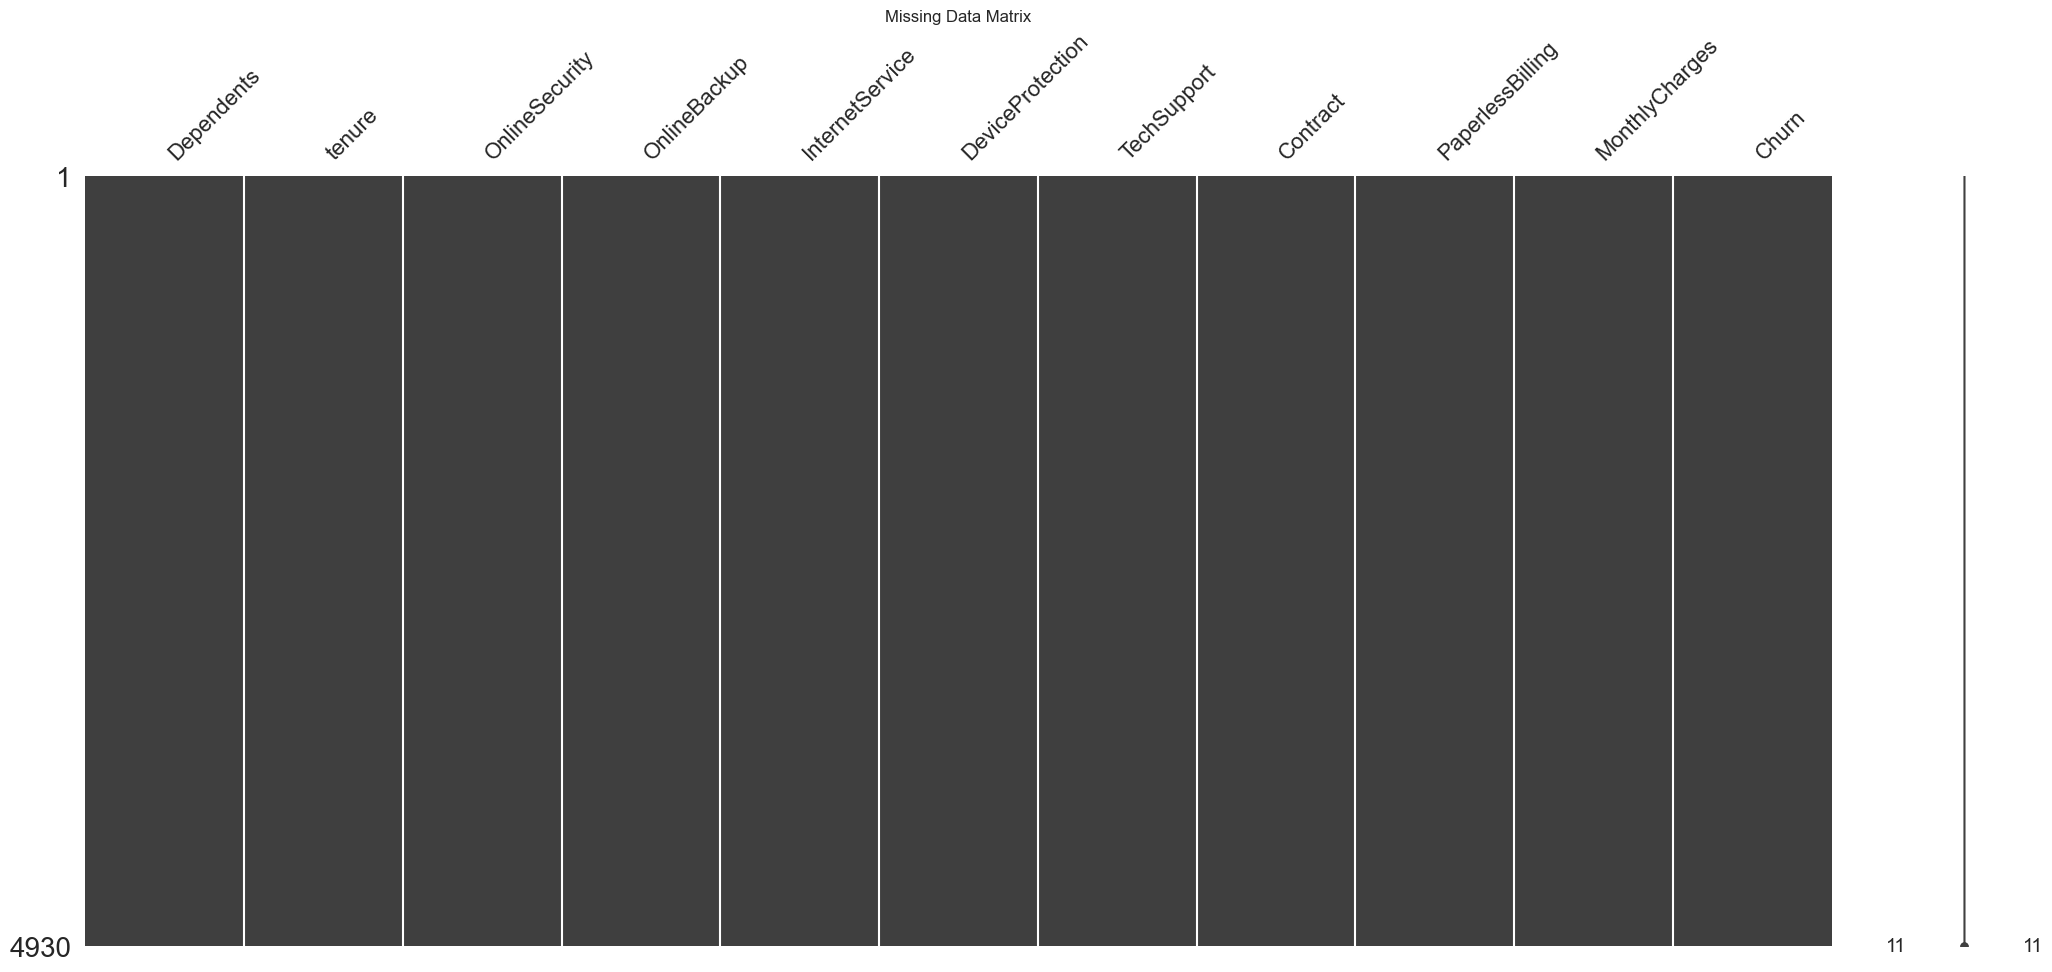

In [28]:
# Check missing values count per column
missing_counts = df.isnull().sum()
print(missing_counts)

# Visualize missing data pattern
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

The summary indicates that there are no missing values across any of the columns in the DataFrame, which consists of 4,930 entries. Each attribute, including Dependents, tenure, OnlineSecurity, OnlineBackup, InternetService, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges, and Churn, has a complete dataset with zero missing entries. This completeness is crucial for conducting accurate analyses and drawing reliable conclusions.

The accompanying visual representation, a missing data matrix, further emphasizes this finding. Each column is displayed without any gaps, confirming that all data points are accounted for. This absence of missing values enhances the integrity of the dataset, allowing for more robust statistical evaluations and insights into customer behavior and service usage. Overall, the DataFrame is well-prepared for further analysis, ensuring that any insights derived will be based on a comprehensive and complete dataset.

### 2.3 Duplicated Values Checking

In [29]:
# Count duplicated rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 77


The presence of 77 duplicated rows in this dataset indicates that these rows are exact copies of others within the same data. Such duplicates can arise from data entry errors, system issues, or legitimate repeated events depending on the context. However, removing duplicates is not always the best course of action.

One reason to retain duplicates is that they may represent valid repeated observations or transactions, which are important for accurate analysis. For example, in transactional data or repeated measurements, duplicates reflect real-world occurrences rather than errors. Removing them could distort data distributions and lead to misleading results. Additionally, duplicates can help validate data consistency and quality during data processing (Oracle Community, 2024).

Moreover, certain analytical methods and visualizations rely on the frequency of data points, where duplicates provide meaningful information rather than noise. Understanding the origin and significance of duplicates is essential before deciding to remove them, as their removal may compromise data integrity and analytical validity (Imhoff, Galemmo, & Geiger, 2003).

In summary, while duplicates often indicate data quality issues, they can also carry important information depending on the dataset and context. Careful assessment ensures that valuable data is preserved, supporting reliable and valid analysis.

### 2.4 Dataset Restructuring for Better EDA

In [30]:
# Convert object columns to category dtype
object_cols = df.select_dtypes(include=['object']).columns.tolist()
df[object_cols] = df[object_cols].astype('category')

# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Dependents        4930 non-null   category
 1   tenure            4930 non-null   int64   
 2   OnlineSecurity    4930 non-null   category
 3   OnlineBackup      4930 non-null   category
 4   InternetService   4930 non-null   category
 5   DeviceProtection  4930 non-null   category
 6   TechSupport       4930 non-null   category
 7   Contract          4930 non-null   category
 8   PaperlessBilling  4930 non-null   category
 9   MonthlyCharges    4930 non-null   float64 
 10  Churn             4930 non-null   category
dtypes: category(9), float64(1), int64(1)
memory usage: 121.6 KB


The DataFrame is restructured for better Exploratory Data Analysis (EDA) because the initial data types are not relevant. This restructuring is performed to enhance the efficiency and clarity of the data, which is crucial for effective analysis. The object columns are converted to categorical data type, a process that is often necessary to ensure that the data is properly formatted for statistical and machine learning tasks (McKinney, 2017; VanderPlas, 2016).

The conversion of object columns to categorical data type is achieved by using the astype('category') method in Pandas. This approach not only improves memory efficiency but also ensures that the data is treated appropriately during analysis. The changes are confirmed by checking the updated data types of the DataFrame using the info() method, which provides a summary of the DataFrame's structure and memory usage (McKinney, 2017; VanderPlas, 2016).

The restructuring process is facilitated by identifying the object columns and applying the necessary conversion. This step is essential in maintaining data integrity and ensuring that the analysis is conducted on the correct data types. The use of categorical data types can also help in reducing errors that might arise from treating categorical variables as strings (Wickham & Grolemund, 2017; McKinney, 2017).

### 2.5 Exploratory Data Analysis (EDA)

#### 2.5.1 Statistics Summary

In [31]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,4930.0,32.401217,24.501193,0.0,9.00,29.00,55.00,72.00
MonthlyCharges,4930.0,64.883032,29.923960,18.8,37.05,70.35,89.85,118.65


The dataset includes information on customer tenure and monthly charges for 4,930 customers. The average tenure is about 32.4 months, with some customers just starting and others staying up to 72 months. Most customers have been with the service for less than 55 months, with 25% staying 9 months or less. Monthly charges vary widely, averaging around 64.88 units. Charges range from 18.8 to 118.65 units, with half of the customers paying less than 70.35 units. Overall, the data shows a diverse range of customer lengths and monthly payments.

In [32]:
df.describe(include=['object','category']).transpose()

,count,unique,top,freq
Dependents,4930,2,No,3446
OnlineSecurity,4930,3,No,2445
OnlineBackup,4930,3,No,2172
InternetService,4930,3,Fiber optic,2172
DeviceProtection,4930,3,No,2186
TechSupport,4930,3,No,2467
Contract,4930,3,Month-to-month,2721
PaperlessBilling,4930,2,Yes,2957
Churn,4930,2,No,3614


For the "Dependents" variable, there are two categories, with the majority (3,446 customers) reporting no dependents. The "OnlineSecurity" and "OnlineBackup" features each have three categories, with "No" being the most common response, reported by 2,445 and 2,172 customers respectively. The "InternetService" variable also has three categories, with "Fiber optic" being the most frequent choice at 2,172 customers.

Regarding "DeviceProtection" and "TechSupport," both have three categories, and "No" is the most common response, with 2,186 and 2,467 customers respectively. The "Contract" variable has three categories, with "Month-to-month" contracts being the most frequent at 2,721 customers. For "PaperlessBilling," there are two categories, with the majority (2,957 customers) opting for paperless billing. Finally, the "Churn" variable, which likely indicates whether a customer has left the service, has two categories, with most customers (3,614) not having churned.

#### 2.5.2 Proportion Analysis

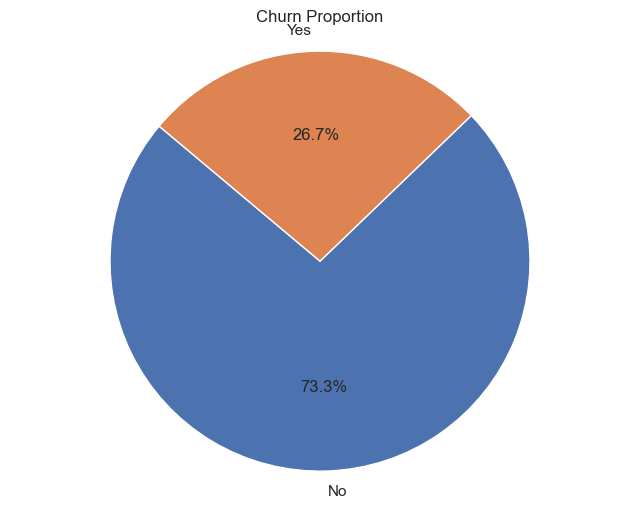

In [33]:
churn_proportion = df['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(churn_proportion, labels=churn_proportion.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Proportion')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()

The pie chart displays the proportion of customers who churn versus those who do not. It shows that approximately 26.7% of customers have churned, while the majority, 73.3%, have remained with the service. This indicates that about one in four customers choose to leave, highlighting a notable churn rate. In terms of dataset balance, this distribution is considered imbalanced because the classes are not evenly represented—about 73% of customers stay while only 27% churn. Commonly, a dataset is regarded as imbalanced if one class exceeds 70% of the total observations (He & Garcia, 2009). Such imbalance can affect the performance of predictive models, as many algorithms may be biased toward the majority class. Special techniques such as resampling, class weighting, or using algorithms designed to handle imbalance may be needed to build effective churn prediction models (He & Garcia, 2009).

#### 2.5.3 Boxplot and Histogram Analysis

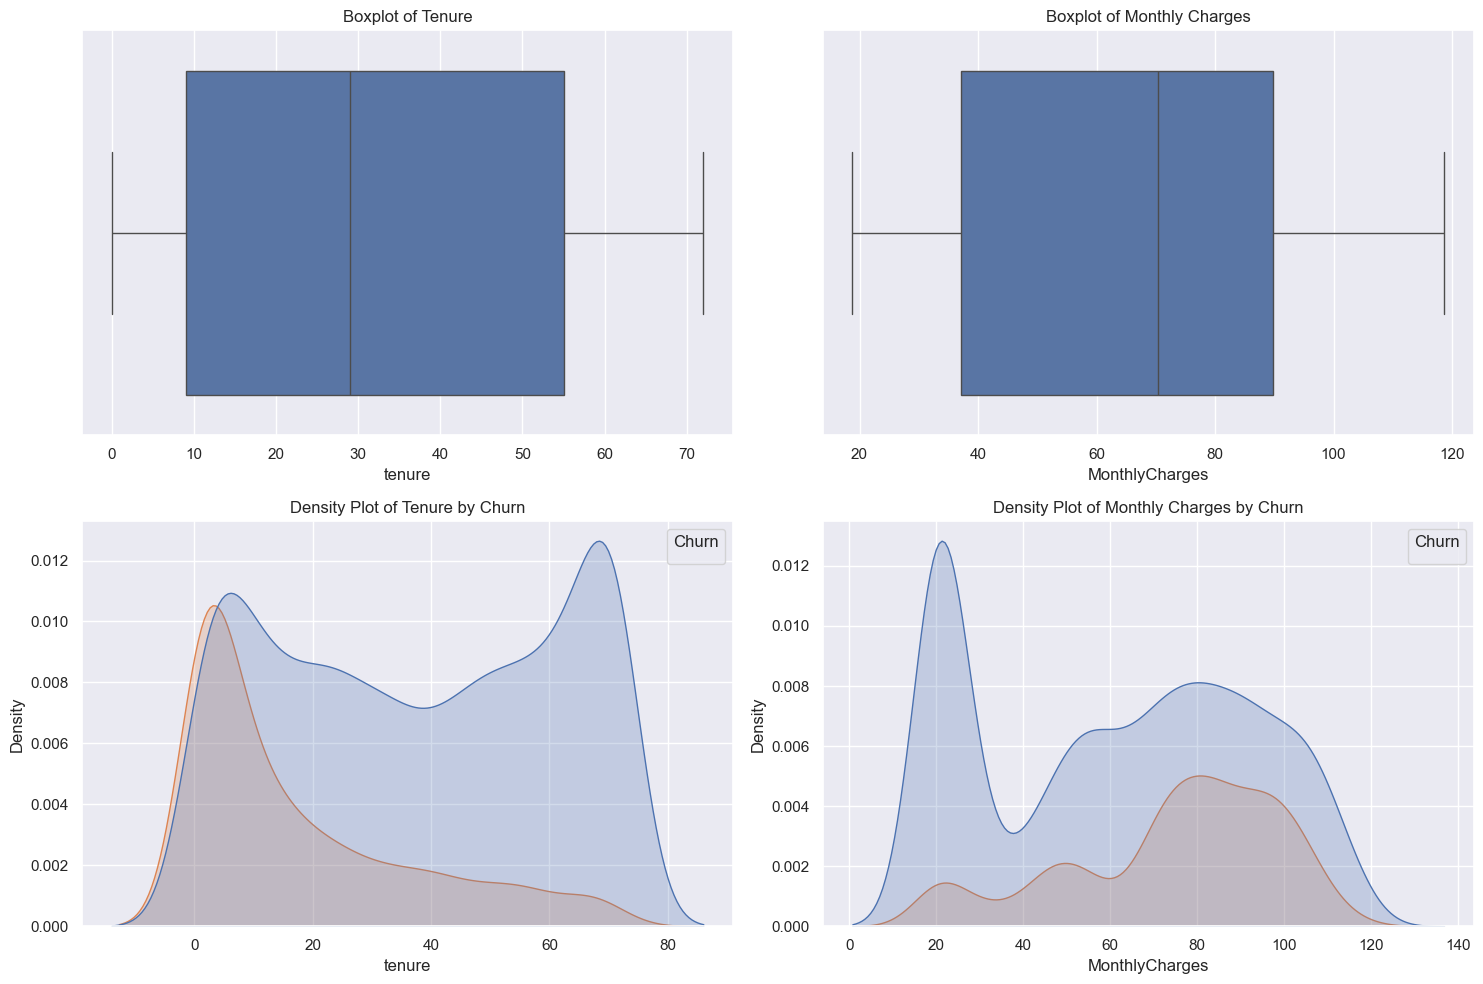

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numerics = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# 1st subplot: Boxplot of 'tenure'
sns.boxplot(x=df['tenure'], orient='h', ax=axes[0])
axes[0].set_title('Boxplot of Tenure')

# 2nd subplot: Boxplot of 'MonthlyCharges'
sns.boxplot(x=df['MonthlyCharges'], orient='h', ax=axes[1])
axes[1].set_title('Boxplot of Monthly Charges')

# 3rd subplot: KDE plot for 'tenure' by 'Churn'
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, ax=axes[2])
axes[2].set_title('Density Plot of Tenure by Churn')
axes[2].legend(title='Churn')

# 4th subplot: KDE plot for 'MonthlyCharges' by 'Churn'
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, ax=axes[3])
axes[3].set_title('Density Plot of Monthly Charges by Churn')
axes[3].legend(title='Churn')

# Adjust layout
plt.tight_layout()
plt.show()


The tenure boxplot shows that customer tenure ranges widely, from 0 to about 72 months. The median tenure is around 29 months, meaning half of the customers stay less than two and a half years, and the other half stay longer. Most customers fall between 9 and 55 months, with no extreme outliers. The data is fairly balanced between short-term and long-term customers.

The monthly charges boxplot indicates that charges vary from about $18 to $118. The median charge is about $70, with most customers paying between $37 and $91. Like tenure, the distribution is fairly even with no unusual values. This suggests that while monthly charges differ, most customers pay within a moderate range. Overall, these plots show clear and consistent patterns in customer tenure and billing.

The density plots reveal important differences between customers who churn and those who do not. For tenure, customers who churn tend to have much shorter tenures, with a peak near zero months, indicating they leave early. In contrast, customers who do not churn show a bimodal distribution with peaks around 1–2 months and again near 70 months, reflecting both new and long-term loyal customers. For monthly charges, customers who churn generally have lower charges, mostly below $40, while those who stay tend to have higher charges spread across a wider range, with peaks near $20 and between $60 and $100.

Since the data is not normally distributed and does not contain outliers, careful consideration should be given to the choice of scaling method to ensure effective model performance. Both Min-Max Scaling and Robust Scaling are recommended to be benchmarked. With Min-Max Scaling, the data is rescaled to a fixed range, typically between 0 and 1, allowing the original distribution shape to be preserved and making it suitable for algorithms requiring normalized inputs (Jain, 2010). In contrast, Robust Scaling is applied using the median and interquartile range, which makes it less sensitive to any potential outliers or skewness, even if minimal (Liu et al., 2020). By comparing both methods, it can be determined which scaling approach better suits the specific dataset and modeling goals, balancing the preservation of data distribution with robustness to subtle irregularities.

#### 2.5.4 Unique Values Analysis

In [35]:
cat_cols = df.select_dtypes(include=['category']).columns

# Dictionary of unique counts per categorical column
unique_counts = {col: df[col].nunique() for col in cat_cols}

# Dictionary of unique values lists per categorical column
unique_values_list = {col: df[col].unique().tolist() for col in cat_cols}

unique_summary = pd.DataFrame({'unique_counts': unique_counts, 'unique_values': unique_values_list})
unique_summary

,unique_counts,unique_values
Dependents,2,"[Yes, No]"
OnlineSecurity,3,"[No, Yes, No internet service]"
OnlineBackup,3,"[No, Yes, No internet service]"
InternetService,3,"[DSL, Fiber optic, No]"
DeviceProtection,3,"[Yes, No internet service, No]"
TechSupport,3,"[Yes, No, No internet service]"
Contract,3,"[Month-to-month, Two year, One year]"
PaperlessBilling,2,"[Yes, No]"
Churn,2,"[Yes, No]"


The dataset contains several categorical variables that are primarily nominal in nature. Variables such as "Dependents," "OnlineSecurity," "OnlineBackup," "DeviceProtection," "TechSupport," "InternetService," "PaperlessBilling," and the target variable "Churn" are classified as nominal. These variables consist of categories that represent distinct groups without any inherent order or ranking. For example, the categories "Yes," "No," and "No internet service" in service-related features serve as labels rather than ordered values. Nominal variables require encoding methods that do not impose ordinal relationships, such as one-hot encoding (Liu et al., 2020).

The only variable identified as ordinal is "Contract," which includes categories like "Month-to-month," "One year," and "Two year." These categories have a natural order based on contract duration, which implies a ranking that should be preserved during encoding. Ordinal variables can be encoded using techniques such as label encoding or ordinal encoding to maintain the meaningful sequence of categories (Liu et al., 2020).

For encoding, it is recommended that nominal variables be transformed using one-hot encoding to avoid introducing artificial order, while the ordinal variable should be encoded with methods that preserve the inherent order of its categories. This approach ensures that the model accurately interprets the categorical data without biasing relationships among categories. Proper encoding is essential for effective feature representation and improved model performance in telecom churn prediction (He & Garcia, 2009; Kumari et al., 2025).

#### 2.5.5 Feature Distribution Analysis (Categorical)

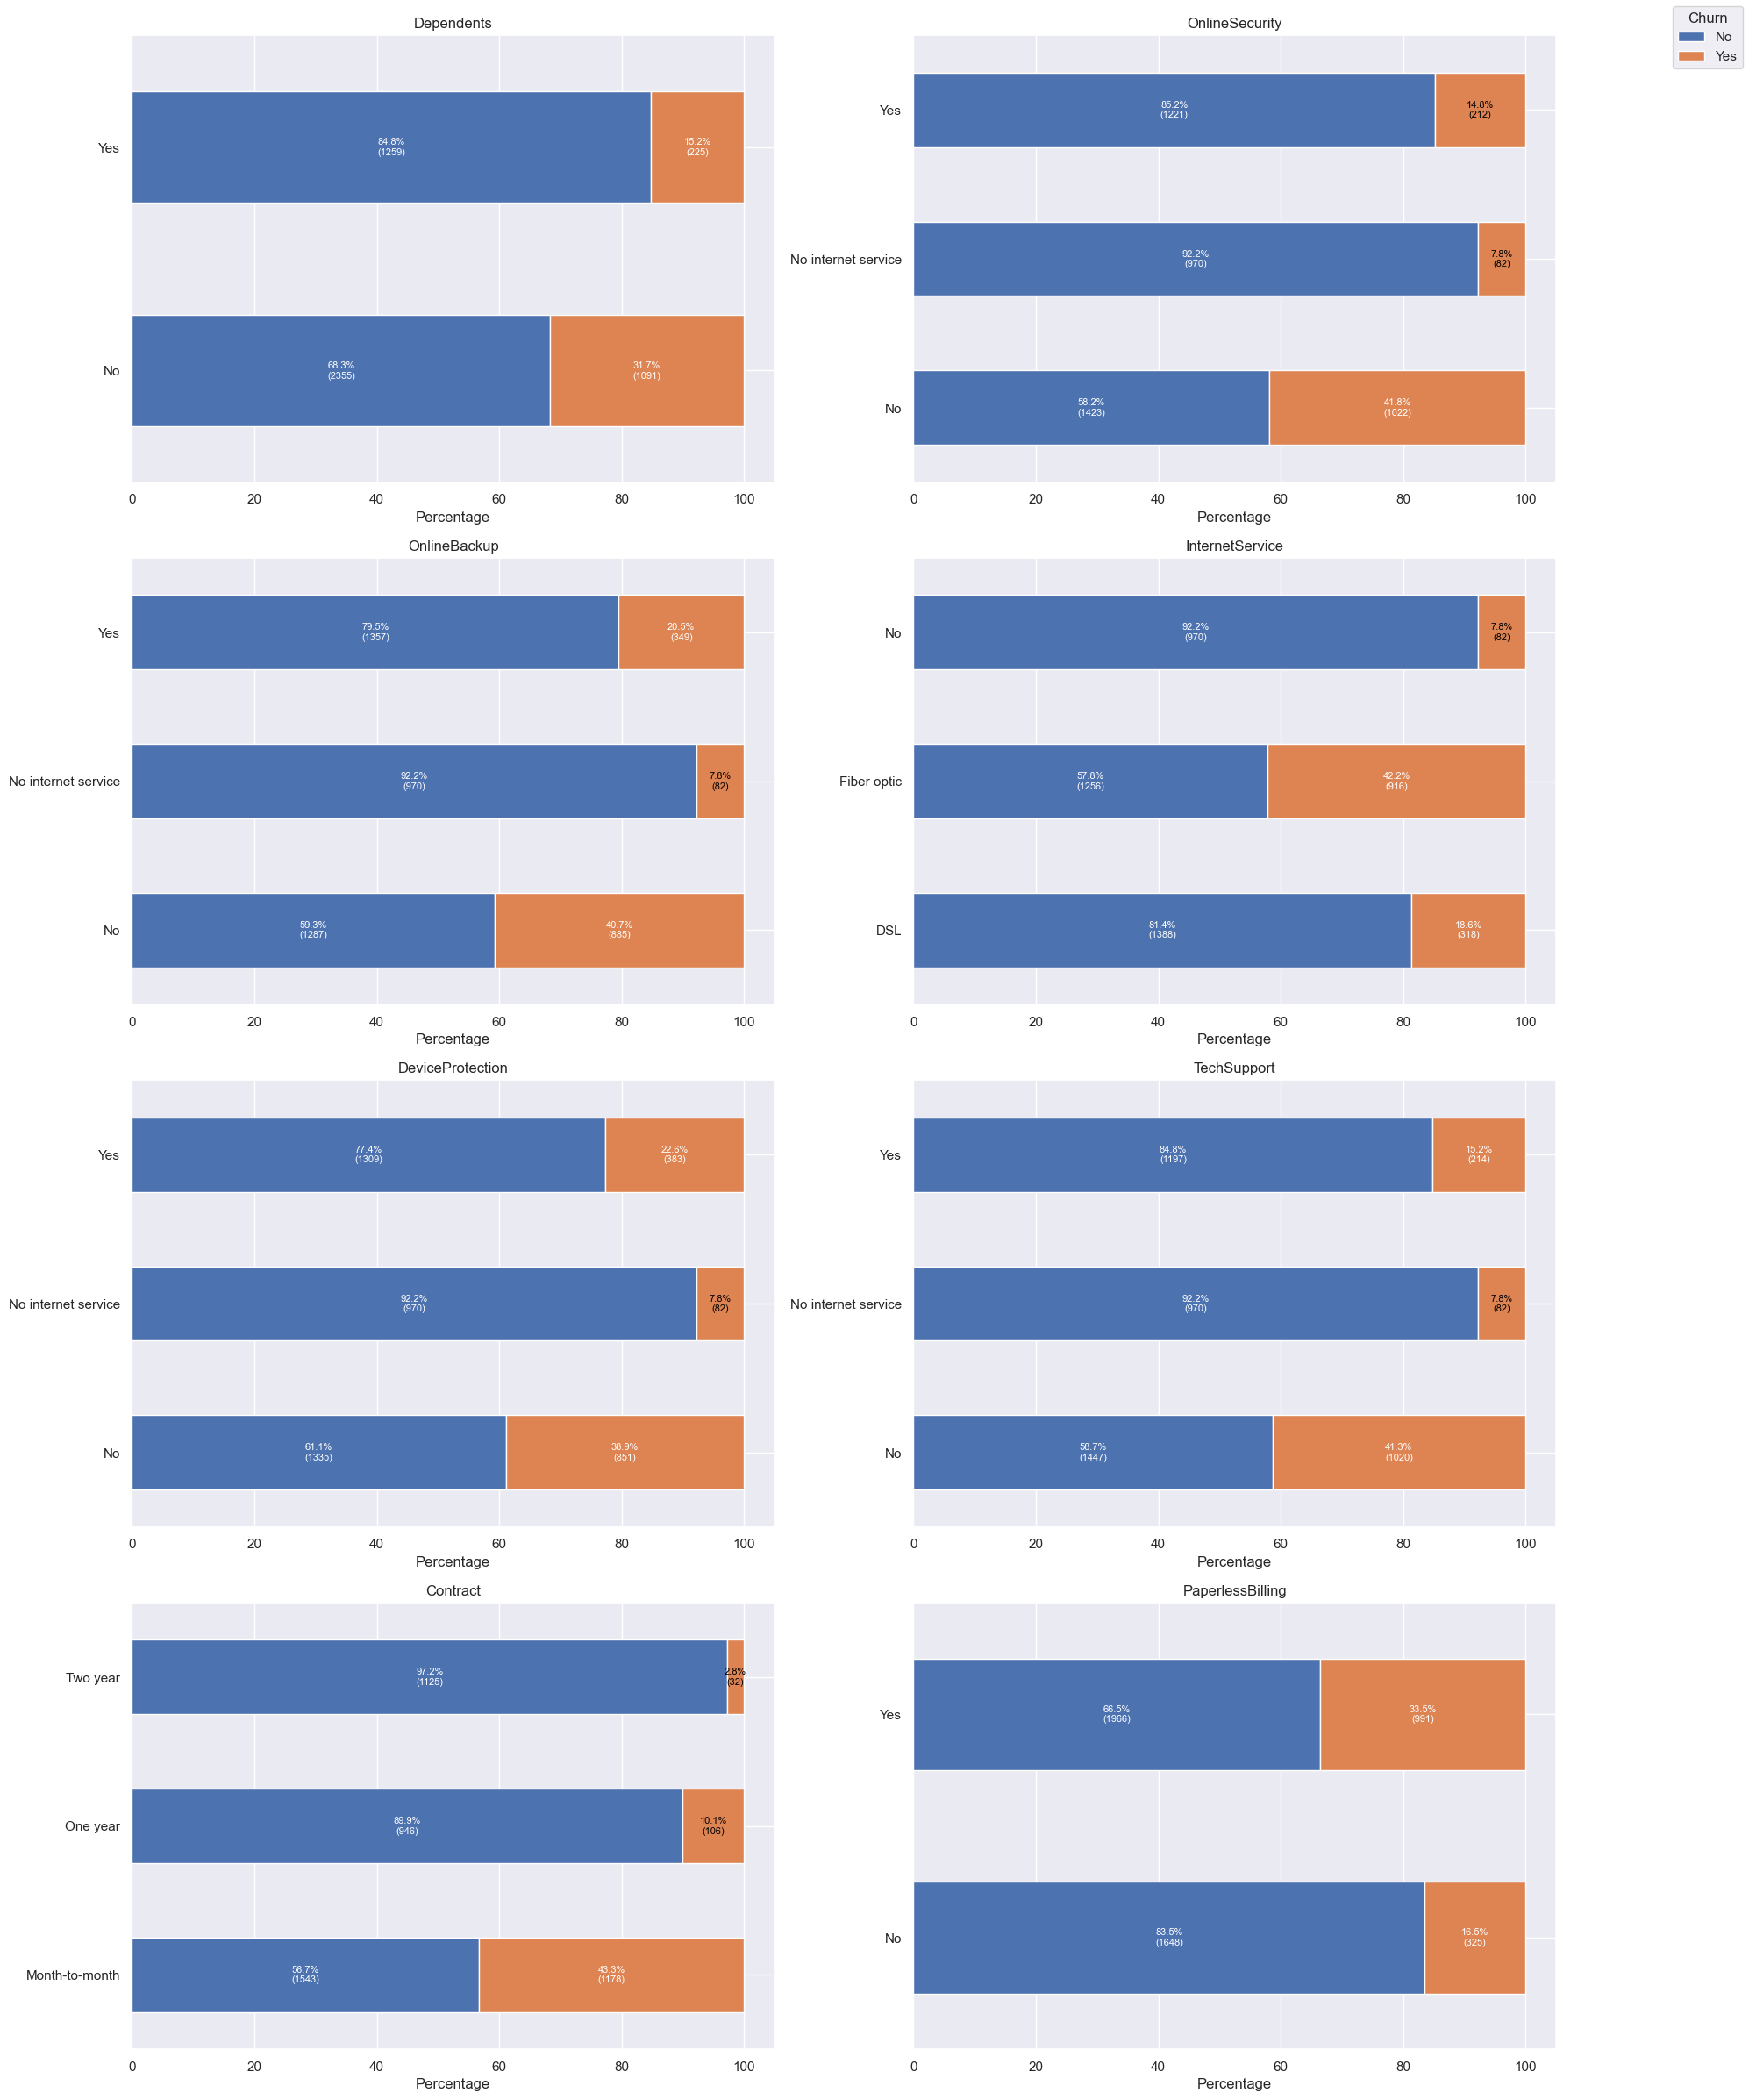

In [36]:
categorical_cols = df.select_dtypes(include='category').columns.drop('Churn')

num_plots = len(categorical_cols)
cols = 2
rows = (num_plots + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 10, rows * 6))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    
    # Compute counts per category and churn status with observed=True
    counts = df.groupby([col, 'Churn'], observed=True).size().unstack(fill_value=0)
    
    # Convert counts to percentages per category level (row-wise)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    
    # Plot horizontal stacked bar chart on the subplot axis
    percentages.plot(kind='barh', stacked=True, ax=ax, legend=False)
    
    ax.set_title(f'{col}')
    ax.set_xlabel('Percentage')
    ax.set_ylabel('')
    
    # Annotate each segment with percentage and count
    for j, (index, row) in enumerate(percentages.iterrows()):
        cum_width = 0
        for churn_status in percentages.columns:
            pct = row[churn_status]
            cnt = counts.loc[index, churn_status]
            if pct > 0:
                label = f'{pct:.1f}%\n({cnt})'
                ax.text(cum_width + pct / 2, j, label, ha='center', va='center', fontsize=8,
                        color='white' if pct > 15 else 'black')
                cum_width += pct

# Remove any unused subplots
for k in range(i + 1, len(axes)):
    fig.delaxes(axes[k])

# Create one legend for all plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Churn', loc='upper right')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space on right for legend
plt.show()

The visualizations display the distribution of customer churn across various categorical features in the telecom dataset. For the variable Dependents, customers without dependents show a notably higher churn rate (31.7%) compared to those with dependents (15.2%). This suggests that customers with dependents tend to stay longer with the service.

In terms of OnlineSecurity, customers who do not have this service exhibit a higher churn rate (41.8%) compared to those who have it (14.8%) or those without internet service (7.8%). A similar pattern is observed for OnlineBackup, where customers lacking the service show a churn rate of 40.7%, much higher than customers with the service (20.5%) or no internet service (7.8%). This trend indicates that the presence of security and backup services may reduce the likelihood of churn.

The InternetService type also influences churn rates. Customers using Fiber optic service have the highest churn rate at 42.2%, while those with DSL service churn at 18.6%, and customers without internet service churn the least at 7.8%. This suggests that fiber optic customers may be more prone to leaving, possibly due to service or pricing factors.

For DeviceProtection, customers without the service show a churn rate of 38.9%, which is considerably higher than those with the service (22.6%) or no internet service (7.8%). Similarly, TechSupport follows this pattern, with a churn rate of 41.3% for customers without support, compared to 15.2% for those with it and 7.8% for those without internet.

The Contract type exhibits a strong relationship with churn. Customers on a month-to-month contract have the highest churn rate (43.3%), while those with one-year and two-year contracts have much lower churn rates of 10.1% and 2.8%, respectively. This confirms that longer contract durations are associated with better customer retention.

Finally, PaperlessBilling shows that customers using paperless billing churn more (33.5%) than those who do not (16.5%). This may reflect behavioral or demographic differences that warrant further investigation.

Overall, these patterns highlight that service features, contract type, and billing preferences are important factors related to customer churn. Such insights can guide targeted retention strategies and inform feature selection for predictive modeling (Kumari et al., 2025; He & Garcia, 2009).

#### 2.5.6 Correlation Analysis

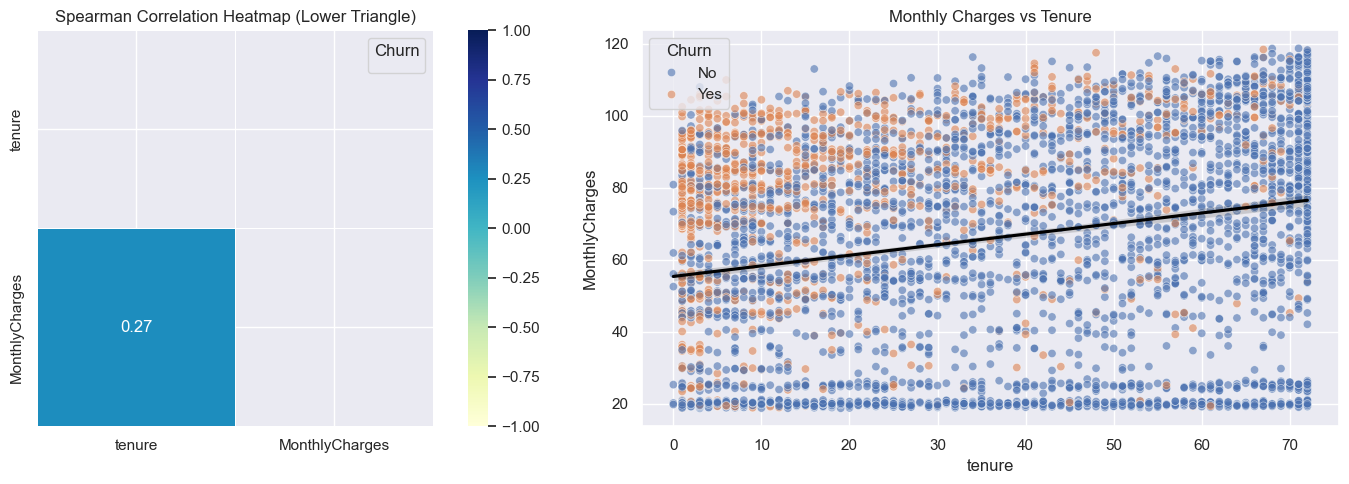

In [37]:
# Compute Spearman correlation matrix for numeric columns
corr = df.corr(numeric_only=True, method='spearman')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1st subplot: KDE plot for 'tenure' by 'Churn'
sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', vmin=-1, vmax=1, square=True, linewidths=0.5, ax=axes[0])
axes[0].set_title('Spearman Correlation Heatmap (Lower Triangle)')

# 2nd subplot: Scatter plot for 'MonthlyCharges' vs 'tenure' colored by 'Churn'
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', ax=axes[1], alpha=0.6)

# Add regression line to the scatter plot
sns.regplot(data=df, x='tenure', y='MonthlyCharges', ax=axes[1], scatter=False, color='black')

axes[1].set_title('Monthly Charges vs Tenure')

# Show the legend
for ax in axes:
    ax.legend(title='Churn')

# Adjust layout
plt.tight_layout()
plt.show()


The Spearman rank correlation coefficient is a non-parametric measure that assesses the strength and direction of a monotonic relationship between two variables without assuming linearity or normal distribution of data (Mukaka, 2012). It quantifies how well the relationship between two variables can be described using a monotonic function, where values closer to +1 or -1 indicate stronger positive or negative monotonic relationships, respectively (Mukaka, 2012; Schober et al., 2018).

Interpretation guidelines often categorize correlation coefficients as weak, moderate, or strong, with coefficients around 0.1 to 0.3 considered weak, 0.3 to 0.5 moderate, and above 0.5 strong (Schober et al., 2018). Therefore, a coefficient of 0.27, as observed between Monthly Charges and Tenure, suggests a weak to moderate positive monotonic association, meaning that as tenure increases, monthly charges tend to increase as well, though the relationship is not very strong.

The Spearman correlation heatmap and scatter plot provide insights into the relationship between Monthly Charges and Tenure in the telecom dataset. The heatmap shows a positive correlation coefficient of 0.27 between these two variables, indicating a weak to moderate positive monotonic relationship. This suggests that as customers’ tenure increases, their monthly charges tend to increase slightly.

The scatter plot further illustrates this relationship by plotting individual customer data points, with tenure on the x-axis and monthly charges on the y-axis. A positive trend line confirms the upward trend, showing that customers with longer tenure generally incur higher monthly charges. The plot also differentiates customers based on churn status, with churned customers (in orange) scattered throughout but more concentrated at lower tenure values and higher monthly charges. This pattern implies that customers who pay higher monthly charges but have shorter tenure are more likely to churn.

Overall, these findings suggest that tenure and monthly charges are related, and their interaction is important for understanding customer behavior. The weak correlation indicates that while monthly charges tend to increase with tenure, other factors also influence churn. These insights can guide feature engineering and model development for churn prediction in telecom (He & Garcia, 2009; Kumari et al., 2025).

## Section 3. Data Preparation
### 3.1 Feature Engineering

In [38]:
df['TotalCharges'] = df['tenure'] * df['MonthlyCharges']

### 3.2 Target Labeling

In [39]:
# Map target variable 'Churn' from Yes/No to 1/0
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

### 3.3 Define Features and Target

In [40]:
# Define feature matrix X and target vector y
X = df.drop(columns=['Churn'])
y = df['Churn']

### 3.4 Train-Test Split

In [41]:
# Stratified split to maintain target distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 3.5 Data Transformation Setup

In [42]:
# Identify categorical columns excluding target
categorical_cols = [col for col in df.select_dtypes(include=['category']).columns if col not in ['Churn', 'Contract']]

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify binary columns (with exactly 2 unique values excluding 'Churn' and 'Contract')
binary_cols = unique_summary[unique_summary['unique_counts'] == 2].index.tolist()
binary_cols = [col for col in binary_cols if col not in ['Churn', 'Contract']]

# Separate categorical columns into binary and non-binary
categorical_cols_no_binary = [col for col in categorical_cols if col not in binary_cols]

# Define the ordinal categories for 'Contract'
contract_categories = [['Month-to-month', 'One year', 'Two year']]

# Function to map 'No'->0 and 'Yes'->1 in binary columns
def map_binary_yes_no(X):
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=binary_cols)
    for col in X.columns:
        X[col] = X[col].map({'No': 0, 'Yes': 1})
        if X[col].isnull().any():
            raise ValueError(f"Unexpected values found in column {col} during binary mapping.")
        X[col] = X[col].astype(np.int64)
    return X.values

# Function to create numeric transformer pipeline based on the scaler type
scalers = [RobustScaler(), MinMaxScaler()]
def create_numeric_transformer(scaler):
    return Pipeline(steps=[
        ('scaler', scaler)
    ])

# Function to create preprocessor with the desired scaling method
def create_preprocessor(scaler):
    numeric_transformer = create_numeric_transformer(scaler)

    binary_transformer = Pipeline(steps=[
        ('map_yes_no', FunctionTransformer(map_binary_yes_no))
    ])

    ordinal_transformer = Pipeline(steps=[
        ('ordinal', OrdinalEncoder(categories=contract_categories))
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ])

    return ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols),
            ('binary', binary_transformer, binary_cols),
            ('ordinal', ordinal_transformer, ['Contract']),
            ('cat', categorical_transformer, categorical_cols_no_binary)
        ],
        remainder='passthrough'
    )

## Section 4. Modeling
### 4.1 Model Initialization and Cross-Validation

In [43]:
# Define models with random_state and n_jobs where applicable
models = {
    'Logistic Regression': LogisticRegression(random_state=42, n_jobs=-1, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42, n_jobs=-1),
    'SVM': SVC(probability=True, random_state=42),
    'k-NN': KNeighborsClassifier(n_jobs=-1),
    'XGBoost': XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier(random_state=42, n_jobs=-1),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0, thread_count=-1)
}

# Define scoring metrics
scoring = ['recall']  # Add other metrics if needed

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize list to store scores
list_scores = []

# Iterate over each scaler
for scaler in scalers:
    for model_name, model in models.items():
        preprocessor = create_preprocessor(scaler)  # Create preprocessor with the current scaler
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        for score in scoring:
            scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=score, n_jobs=-1)
            list_scores.append({
                'Model': model_name,
                'Metric': score,
                'Mean Score': np.mean(scores),
                'Std Dev': np.std(scores),
                'Scaler': 'Robust' if isinstance(scaler, RobustScaler) else 'MinMax'
            })

# Create DataFrame from scores
results_df = pd.DataFrame(list_scores)
results_df = results_df.sort_values(by=['Mean Score', 'Std Dev'], ascending=[False, True])
display(results_df)

# Find the best score for each metric
best_scores = results_df.loc[results_df.groupby(['Metric'])['Mean Score'].idxmax()]

# Extract the best model and scaler overall
overall_best = best_scores.loc[best_scores['Mean Score'].idxmax()]
best_model = overall_best['Model']
best_scaler = overall_best['Scaler']

# Display the best scalers for each metric
print("Best Scalers for Each Metric:")
display(best_scores[['Metric', 'Model', 'Scaler', 'Mean Score', 'Std Dev']])

print(f"\nOverall Best Model: {best_model} with {best_scaler} Scaler")

# Define the best scaler based on the identified best scaler
if best_scaler == 'Robust':
    best_scaler_instance = RobustScaler()
else:
    best_scaler_instance = MinMaxScaler()

# Update the preprocessor variable with the best scaler
preprocessor = create_preprocessor(best_scaler_instance)

# Now you can use the updated preprocessor in your final model pipeline
best_base_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', models[best_model])  # Use the best model from the results
])

# Display the final best pipeline
display(best_base_pipeline)

,Model,Metric,Mean Score,Std Dev,Scaler
4,AdaBoost,recall,0.542293,0.044658,Robust
15,AdaBoost,recall,0.542293,0.044658,MinMax
0,Logistic Regression,recall,0.531839,0.028766,Robust
11,Logistic Regression,recall,0.526139,0.023607,MinMax
20,LightGBM,recall,0.525105,0.028711,MinMax
9,LightGBM,recall,0.525091,0.036267,Robust
3,Gradient Boosting,recall,0.524171,0.030767,Robust
14,Gradient Boosting,recall,0.524171,0.030767,MinMax
10,CatBoost,recall,0.517495,0.033381,Robust
21,CatBoost,recall,0.517495,0.033381,MinMax


Best Scalers for Each Metric:


,Metric,Model,Scaler,Mean Score,Std Dev
4,recall,AdaBoost,Robust,0.542293,0.044658



Overall Best Model: AdaBoost with Robust Scaler


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('binary',
                                                  Pipeline(steps=[('map_yes_no',
                                                                   FunctionTransformer(func=<function map_binary_yes_no at 0x0000027EEF18B1A0>))]),
                                                  ['Dependents',
                                                   'PaperlessBilling']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year']]))]),
                                                  ['Contract']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport'])])),
                ('classifier', AdaBoostClassifier(random_state=42))])

### 4.2 Hyperparameter Tuning

In [44]:
# Define categorical feature indices for SMOTENC
categorical_columns = X_train.select_dtypes(include=['category', 'object']).columns.tolist()
categorical_features = [X_train.columns.get_loc(col) for col in categorical_columns]

# Define the base pipeline steps: preprocessor, resampler (placeholder), classifier
base_steps = [
    ('preprocessor', preprocessor),  # preprocessor with best scaler (e.g., RobustScaler)
    ('resampler', None),  # placeholder for resampler, will be tuned
    ('classifier', AdaBoostClassifier(random_state=42))
]

# Create imbalanced-learn pipeline
imb_pipeline = ImbPipeline(steps=base_steps)

# Define parameter distribution including resampler choice and AdaBoost hyperparameters
param_distributions = {
    'resampler': [
        RandomOverSampler(random_state=42),
        SMOTE(random_state=42),
        SMOTENC(categorical_features=categorical_features, random_state=42),
        SMOTEN(random_state=42),
        ADASYN(random_state=42),
        BorderlineSMOTE(random_state=42),
        KMeansSMOTE(random_state=42),
        SVMSMOTE(random_state=42),
        SMOTEENN(random_state=42),
        SMOTETomek(random_state=42),
        None  # No resampling
    ],
    'classifier__n_estimators': [50, 100, 150, 200, 250],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'classifier__algorithm': ['SAMME', 'SAMME.R']
}

# Setup RandomizedSearchCV with recall scoring and stratified CV
random_search = RandomizedSearchCV(
    estimator=imb_pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='recall',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV on training data
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    random_search.fit(X_train, y_train)

# Output best parameters and best recall score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Recall Score:", random_search.best_score_)

# Update best pipeline with tuned parameters
best_tuned_pipeline = random_search.best_estimator_
display(best_tuned_pipeline)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'resampler': SVMSMOTE(random_state=42), 'classifier__n_estimators': 100, 'classifier__learning_rate': 0.05, 'classifier__algorithm': 'SAMME'}
Best Recall Score: 0.888873843376213


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('binary',
                                                  Pipeline(steps=[('map_yes_no',
                                                                   FunctionTransformer(func=<function map_binary_yes_no at 0x0000027EEF18B1A0>))]),
                                                  ['Dependents',
                                                   'PaperlessBilling']),
                                                 ('ordinal',
                                                  Pipe...
                                                                                               'year']]))]),
                                                  ['Contract']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport'])])),
                ('resampler', SVMSMOTE(random_state=42)),
                ('classifier',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=0.05,
                                    n_estimators=100, random_state=42))])

### 4.3 Evaluate Best Model on Test Data

In [45]:
pass

### 4.4 Learning Curve

In [46]:
pass

### 4.5 Threshold Tuning Using Precision-Recall Curve

In [47]:
pass

## Section 5. Evaluation

### 5.1 Feature Importance Using SHAP

In [48]:
pass

### 5.2 Confusion Matrix Visualization

In [49]:
pass

## Section 6. Deployment
### 6.1 Save Model Using Joblib

In [50]:
pass

### 6.2 How to Load and Use Saved Model

In [51]:
pass

### 6.3 Model Limitations
- Model depends on data quality and feature relevance.
- Changes in customer behavior or services may reduce model accuracy over time.
- Periodic retraining and monitoring are recommended.

## Section 7. Conclusion and Recommendations
### 7.1 Conclusion
- Developed model predicts churn with good recall and ROC-AUC.
- Identified key factors influencing churn with interpretable methods.
- Threshold tuning improved recall, important for business objectives.

### 7.2 Recommendations
- Regularly update and monitor model performance.
- Use insights to improve customer retention strategies.
- Consider deploying model with monitoring for data drift.

## References

Bhatnagar, A., & Srivastava, S. (2025). Customer churn analysis in telecom. *Computing Online.* https://computingonline.net/computing/article/view/3873

BlastChar. (2018). *Telco customer churn prediction* [Dataset]. Kaggle. https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Britto, F. (2024, September 9). Churn in telecom: What it is and its impacts. *SYDLE.* https://www.sydle.com/blog/churn-telecom-66b4c9e8b2713612fa17da85

He, H., & Garcia, E. A. (2009). Learning from imbalanced data. *IEEE Transactions on Knowledge and Data Engineering, 21*(9), 1263–1284. https://doi.org/10.1109/TKDE.2008.239

Imhoff, C., Galemmo, N., & Geiger, J. G. (2003). *Mastering data warehouse design: Relational and dimensional techniques*. John Wiley & Sons.

Investopedia Team. (2024, March 21). Churn rate: What it means, examples, and calculations. *Investopedia.* https://www.investopedia.com/terms/c/churnrate.asp

IQ Team. (2025, February 23). Top 17 customer churn datasets and projects (Updated for 2025). *Interview Query.* https://www.interviewquery.com/p/customer-churn-datasets

Jain, A. K. (2010). Data clustering: 50 years beyond K-means. *Pattern Recognition Letters, 31*(8), 651–666. https://doi.org/10.1016/j.patrec.2009.09.011

Kumari, D., Singh, S. K., Katira, S. S., Srinivas, I. V., & Salunkhe, U. (2025). Telecom customer churn forecasting using machine learning: A data-driven predictive framework. *Metallurgical and Materials Engineering, 31*(4), 922–929. https://doi.org/10.63278/1536

Liu, H., Motoda, H., Setiono, R., & Zhao, Z. (2020). Feature selection: An ever-evolving frontier in data mining. *Journal of Machine Learning Research, 21*(1), 1–50.

Luck, I. (2023, April 4). What is customer churn? Complete meaning & guide. *CustomerGauge.* https://customergauge.com/customer-churn

McKinney, W. (2017). *Python for data analysis: Data wrangling with pandas, NumPy, and IPython* (2nd ed.). O'Reilly Media.

Mukaka, M. M. (2012). A guide to appropriate use of correlation coefficient in medical research. *Malawi Medical Journal*, 24(3), 69–71. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/

Schober, P., Boer, C., & Schwarte, L. A. (2018). Correlation coefficients: Appropriate use and interpretation. *Anesthesia & Analgesia*, 126(5), 1763–1768. https://doi.org/10.1213/ANE.0000000000002864

O’Brien, K., & Downie, A. (2024, September 9). What is customer churn? *IBM.* https://www.ibm.com/think/topics/customer-churn

Oracle Community. (2024). OAC - Table visualization in DV duplicate rows, but LSQL is correct. *Oracle Community.* https://community.oracle.com/products/oracleanalytics/discussion/21184/oac-table-visualization-in-dv-duplicate-rows-but-lsql-is-correct

VanderPlas, J. (2016). *Python data science handbook: Essential tools for working with data*. O'Reilly Media.

Wickham, H., & Grolemund, G. (2017). *R for data science: Import, tidy, transform, visualize, and model data*. O'Reilly Media.
